<a href="https://colab.research.google.com/github/cychen116/ExploratoryDataAnalysis_practice/blob/main/06_EDA_practice_NLP_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Data Loading

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
data_dir = "/content/drive/My Drive/Colab Notebooks/EMSE 6574_c/Data"
!ls '{data_dir}'

 cities_distance.csv			   News_Category_Dataset_v2.json
 cities_distance.xlsx			   obamaFB_sample.csv
'Copy of News_Category_Dataset_v2.json'    pharma_sales.csv
 datasets_1474_2639_IMDB-Movie-Data.csv    pharma_sales.xlsx
 datasets_1474_2639_IMDB-Movie-Data.xlsx   StockPrice
 diamonds.csv				   tweets.json
'FEC dataset'				   USpresidentSpeech.csv
 ML_Iris


In [10]:
df = pd.read_csv(f'{data_dir}/USpresidentSpeech.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,year,president,party,text
0,1961,John F. Kennedy,D,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,1965,Lyndon Baines Johnson,D,"My fellow countrymen, on this occasion, the oa..."
2,1969,Richard Milhous Nixon,R,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P..."
3,1974,Jimmy Carter,D,"Mr. Chief Justice, my dear friends, my fellow ..."
4,1981,Ronald Reagan,R,"Senator Hatfield, Mr. Chief Justice, Mr. Presi..."


# Tokenization

In [13]:
import nltk
import string
from nltk.stem import *
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
### preprocessing -- clean out punctuation, tokenize, stop-words, lemmatize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
def process(line):
    return([wordnet_lemmatizer.lemmatize(t) for t in tokenizer.tokenize(line) if t not in stop_words])
    

df['tokens'] = df['text'].str.lower().apply(process)

In [15]:
df.head()

,year,president,party,text,tokens
0,1961,John F. Kennedy,D,"Vice President Johnson, Mr. Speaker, Mr. Chief...","[vice, president, johnson, mr, speaker, mr, ch..."
1,1965,Lyndon Baines Johnson,D,"My fellow countrymen, on this occasion, the oa...","[fellow, countryman, occasion, oath, taken, go..."
2,1969,Richard Milhous Nixon,R,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...","[senator, dirksen, mr, chief, justice, mr, vic..."
3,1974,Jimmy Carter,D,"Mr. Chief Justice, my dear friends, my fellow ...","[mr, chief, justice, dear, friend, fellow, ame..."
4,1981,Ronald Reagan,R,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...","[senator, hatfield, mr, chief, justice, mr, pr..."


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 2)
text_bow = vectorizer.fit_transform(df['text'])
text_bow_dense = pd.DataFrame(text_bow.todense(), columns = vectorizer.get_feature_names()) 
text_bow_dense.sample(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abiding,about,above,abraham,abroad,accept,achieve,achievement,across,act,action,acts,add,administration,advance,adversaries,afford,after,again,against,age,aggression,ago,ahead,alike,all,alliances,allies,allow,allows,almighty,almost,alone,along,also,always,am,america,american,americans,...,when,where,whether,which,while,white,who,whole,whom,whose,will,willing,win,winter,wisdom,with,within,without,women,wonderful,word,words,work,workers,working,works,world,would,wounded,wounds,write,written,wrong,year,years,yes,yet,you,young,your
2,0,0,0,0,1,0,2,2,1,0,0,0,1,1,0,1,1,1,0,0,0,0,2,0,1,12,0,0,0,1,0,0,1,0,2,0,0,6,3,1,...,2,4,1,3,1,2,11,1,0,0,17,1,1,0,1,13,3,2,0,0,0,3,0,0,0,0,13,4,1,0,1,0,0,1,5,0,0,2,0,0
3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,1,1,2,2,2,4,...,0,0,0,0,0,1,4,1,0,1,8,0,1,0,0,9,0,0,0,1,0,0,0,0,0,1,2,1,0,1,0,0,0,1,1,0,0,10,0,7
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0
1,1,1,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,5,2,0,0,0,0,0,11,0,0,0,0,0,0,1,0,0,4,0,3,6,1,...,1,3,0,2,0,0,9,1,0,0,16,0,0,0,1,4,1,5,0,0,0,1,3,0,1,0,7,2,0,1,1,1,0,0,3,0,0,3,1,1
9,0,2,0,0,0,1,0,0,5,0,2,0,0,1,0,0,0,0,9,1,0,0,0,0,0,14,1,0,1,0,1,0,0,1,0,2,0,19,11,4,...,3,0,3,4,6,1,1,0,0,0,42,0,0,0,1,8,0,0,2,1,0,1,1,2,0,0,6,0,0,0,0,0,0,0,2,1,0,14,1,11


# K-Means Cluster

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters = 2, # Two Parties
    random_state = 1)
kmeans.fit(text_bow)

KMeans(n_clusters=2, random_state=1)

In [18]:
df['P_cluster'] = kmeans.predict(text_bow)
df

,year,president,party,text,tokens,P_cluster
0,1961,John F. Kennedy,D,"Vice President Johnson, Mr. Speaker, Mr. Chief...","[vice, president, johnson, mr, speaker, mr, ch...",1
1,1965,Lyndon Baines Johnson,D,"My fellow countrymen, on this occasion, the oa...","[fellow, countryman, occasion, oath, taken, go...",1
2,1969,Richard Milhous Nixon,R,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...","[senator, dirksen, mr, chief, justice, mr, vic...",0
3,1974,Jimmy Carter,D,"Mr. Chief Justice, my dear friends, my fellow ...","[mr, chief, justice, dear, friend, fellow, ame...",1
4,1981,Ronald Reagan,R,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...","[senator, hatfield, mr, chief, justice, mr, pr...",0
5,1989,George Bush,R,"Mr. Chief Justice, Mr. President, Vice Preside...","[mr, chief, justice, mr, president, vice, pres...",0
6,1993,William Clinton,D,My fellow citizens :Today we celebrate the mys...,"[fellow, citizen, today, celebrate, mystery, a...",1
7,2001,George W. Bush,R,"President Clinton, distinguished guests and my...","[president, clinton, distinguished, guest, fel...",1
8,2009,Barack Obama,D,My fellow citizens:I stand here today humbled ...,"[fellow, citizen, stand, today, humbled, task,...",1
9,2017,Donald Trump,R,"Chief Justice Roberts, President Carter, Presi...","[chief, justice, robert, president, carter, pr...",1


In [20]:
kmeans = KMeans(
    n_clusters = 3, # Two Parties
    random_state = 1)
kmeans.fit(text_bow)
df['style_cluster']  = kmeans.predict(text_bow)
y_predict = kmeans.predict(text_bow)
df

,year,president,party,text,tokens,P_cluster,style_cluster
0,1961,John F. Kennedy,D,"Vice President Johnson, Mr. Speaker, Mr. Chief...","[vice, president, johnson, mr, speaker, mr, ch...",1,0
1,1965,Lyndon Baines Johnson,D,"My fellow countrymen, on this occasion, the oa...","[fellow, countryman, occasion, oath, taken, go...",1,0
2,1969,Richard Milhous Nixon,R,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...","[senator, dirksen, mr, chief, justice, mr, vic...",0,1
3,1974,Jimmy Carter,D,"Mr. Chief Justice, my dear friends, my fellow ...","[mr, chief, justice, dear, friend, fellow, ame...",1,2
4,1981,Ronald Reagan,R,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...","[senator, hatfield, mr, chief, justice, mr, pr...",0,1
5,1989,George Bush,R,"Mr. Chief Justice, Mr. President, Vice Preside...","[mr, chief, justice, mr, president, vice, pres...",0,1
6,1993,William Clinton,D,My fellow citizens :Today we celebrate the mys...,"[fellow, citizen, today, celebrate, mystery, a...",1,0
7,2001,George W. Bush,R,"President Clinton, distinguished guests and my...","[president, clinton, distinguished, guest, fel...",1,0
8,2009,Barack Obama,D,My fellow citizens:I stand here today humbled ...,"[fellow, citizen, stand, today, humbled, task,...",1,2
9,2017,Donald Trump,R,"Chief Justice Roberts, President Carter, Presi...","[chief, justice, robert, president, carter, pr...",1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


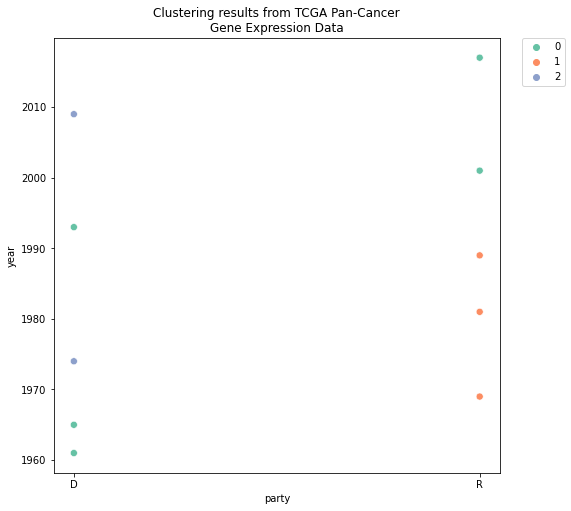

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "party",
    "year",
    s=50,
    data=df,
    hue="style_cluster",
    palette="Set2",)

scat.set_title("Clustering results from TCGA Pan-Cancer\nGene Expression Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

# K-Means Clustering Evaluation


If you have the ground-truth for labels, there are three metrics you can use to evaluate how well your clustering did: completeness, homogeneity, and V-measure.

*   Completeness: A score from 0 to 1 indicating if all points for a particular category are assigned to the same cluster. Higher is better.
*   Homogeneity: A score from 0 to 1 indicating how well each cluster is in only containing members of a single category. Higher is better.
*   V-measure: A score from 0 to 1 that is the harmonic mean of completeness and homogeneity. Higher is better.


In [23]:
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

print(f'Completeness Score: {completeness_score(df["party"], df["P_cluster"])}')
print(f'Homogeneity Score:  {homogeneity_score(df["party"], df["P_cluster"])}')
print(f'V-measure Score:    {v_measure_score(df["party"], df["P_cluster"])}')

Completeness Score: 0.44913161176278904
Homogeneity Score:  0.3958156020033586
V-measure Score:    0.4207914918051404


# Next...

If I import more data text, the result may be more interesting.